<span style="color: orange">DRAFT: WILL BE FINALIZED BY FRIDAY. PROBABLY ONLY SMALL CHANGES IF ANY.</span>

## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 6: Fourier Analysis
## Due 13 November, 2019 at 6:00 PM
### <span style="color: red">YOUR NAME HERE</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebook for lecture 4. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory overview of the incredibly rich and expansive subject of Fourier Analysis. 
- If you would like more resources, the following book is a good place to start. It is actually the notes used to teach intro signal processing at Stanford. Most of the material I covered in class is in these notes, plu a whole lot more.
> Osgood, [Lecture notes for EE 261](
https://see.stanford.edu/materials/lsoftaee261/book-fall-07.pdf).
- A more advanced and concise treatment of the subject is in the following book.
> Stein and Shakarchi, [Fourier Analysis: An Introduction](https://www.amazon.com/Fourier-Analysis-Introduction-Princeton-Lectures/dp/069111384X/ref=sr_1_1?keywords=stein+and+shakarchi+fourier&qid=1572974320&sr=8-1).

In [38]:
import cmath
import numpy as np
import scipy
import imageio

import sympy as sm
sm.init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [46]:
import seaborn as sns

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
colors = sns.color_palette()
sns.set(style='whitegrid', context='notebook', rc={'axes.labelsize': 16})

### 1. Exponential form of Complex Numbers (10pts)

Express each of the following complex numbers in the form $r e^{i\theta}$. Do this by hand (or in Latex) and check your work with Python.

$$0$$
$$1$$
$$-1$$
$$i$$
$$1-2i$$
$$-8+7i$$

**Grading Breakdown:**

    (10/12)pt per correct magnitude 
    (10/12)pt per correct phase

Interesting read on complex sinusoids:

https://www.dsprelated.com/freebooks/mdft/Complex_Sinusoids.html

In [50]:
# Could use this
def ExponentialForm(f):
    """Takes input complex expression and returns Euler exponential form."""
    re_part = sm.re(f); im_part = sm.im(f)
    return sm.sqrt(re_part**2 + im_part**2) * sm.exp(sm.I * sm.atan2(im_part, re_part))

In [52]:
nums = [0, 1, -1, 1j, 1-2j, -8+7j]

for i in nums:
    print('Mag:', abs(i), 'Phase:', cmath.phase(i)*(180/np.pi))

Mag: 0 Phase: 0.0
Mag: 1 Phase: 0.0
Mag: 1 Phase: 180.0
Mag: 1.0 Phase: 90.0
Mag: 2.23606797749979 Phase: -63.43494882292201
Mag: 10.63014581273465 Phase: 138.81407483429035


### 2. A Trigonometric Identity

The goal of this exercise is to find formulas for $\cos(\alpha+\beta)$ and $\sin(\alpha + \beta)$. in terms of $\sin\alpha$, $\sin\beta$, $\cos\alpha$, and $\cos\beta$.

a) First, express $e^{(\alpha+\beta)i}$ directly in terms of the $\sin$ and $\cos$ using Euler's formula.

b) Next, express $e^{(\alpha+\beta)i}$ as a product of two exponentials. Then convert each term in the product into $\sin$ and $\cos$ using Euler's formula. Expand the expression and group the terms in the real part and the imaginary part.

c) Equate the real parts and imaginary parts from (a) and (b).

**Grading Breakdown:**

    2pts (a) for using Euler's Formula with angle (alpha + beta) 
    3pts (b) for using Euler's formula on e^(i alpha) and e^(i beta)
    2pts (b) for multiplying the terms to get a real expression and an imaginary expression
    3pts (c) for equating the corresponding parts and getting the identities

2.a) 

We begin with the complex exponential:

$$
e^{(\alpha + \beta)i} = \cos{(\alpha + \beta)} + i \sin{(\alpha + \beta)} .
$$

2.b)

Next, the product of complex exponentials gives us:
$$
e^{\alpha i}e^{\beta i}  = (\cos{(\alpha)} + i \sin{(\alpha)})(\cos{(\beta)} + i \sin{(\beta)}) \\
= (\cos{(\alpha)}\cos{(\beta)} - \sin{(\alpha)}\sin{(\beta)}) + i(\cos{(\alpha)}\sin{(\beta)} - \sin{(\alpha)}\cos{(\beta)}).
$$

2.c)

Equating the coefficients of the real and imaginary parts of the two equations gives us the following identities:

$$
\cos{(\alpha + \beta)} = \cos{(\alpha)}\cos{(\beta)} - \sin{(\alpha)}\sin{(\beta)} \\
\sin{(\alpha + \beta)} = \cos{(\alpha)}\sin{(\beta)} - \sin{(\alpha)}\cos{(\beta)}.
$$

### 3. Fourier Series Approximation

Similar to the example of the square wave done in class, find a Fourier Series approximation to the function

$$
f(t) = \left |cos(2\pi t) \right|
$$

which is a *rectified cosine*. Make sure you get the period of this function correct. Make a plot with three subplots for $N=5$, $N=10$, and $N=20$ showing better and better approximations.

**Grading Breakdown:**

    1pt for getting the correct period: P = 0.5 
    1pt for finding the coefficients (either complex or using the trig fourier series)
    2pts per plot showing better and better approximations (6pts total)
    2pts if they plots show at least one full period

In [4]:
# f(t) = |cos(2 pi t)|
# Note that the magnitude of the coefficients decreases like 1/n, showing that
# higher and higher frequencies contribute less and less to the overall shape.

t = sm.symbols("t", real=True)
n = sm.symbols("n", integer=True, positive=True)

f = sm.cos(2*sm.pi*t) # function of interest
T = sm.Rational(1,4) # half period (since symmetric interval is used)
q = -sm.pi*sm.I*n*t / T # arguments of the exponential in the cn equation

# Formula for the complex coefficients
cn = (1/(2*T))*sm.integrate(f*sm.exp(q), (t,-T,T)) 
cn # Complex coefficients

              2                             2              
- ────────────────────────── - ────────────────────────────
       2  ⅈ⋅π⋅n        ⅈ⋅π⋅n        2  -ⅈ⋅π⋅n        -ⅈ⋅π⋅n
  8⋅π⋅n ⋅ℯ      - 2⋅π⋅ℯ        8⋅π⋅n ⋅ℯ       - 2⋅π⋅ℯ      

In [5]:
sm.simplify(cn)

        n   
 -2⋅(-1)    
────────────
  ⎛   2    ⎞
π⋅⎝4⋅n  - 1⎠

In [6]:
def get_terms(cns, n, N, T):
    '''
    Assumes: cns are the complex coefficients, n i a symbolic variable, N is the number of terms desired,
             and T is the symmetric half period
    Returns: the terms of the Fourier series in list format
    '''
    upper = int(np.ceil(N/2)) 
    lower = -int(np.floor(N/2))
    vals = range(lower,upper)
    terms = [cn.subs(n,k)*sm.exp(sm.pi*sm.I*k*t / T) for k in vals]
    return terms

In [7]:
# Here are some of the terms of the Fourier Series
N1, N2, N3 = [5, 10, 20] 

terms1 = get_terms(cn,n,N1,T)
terms2 = get_terms(cn,n,N2,T)
terms3 = get_terms(cn,n,N3,T)

#terms = [i for i in terms if i != sm.nan] removes 'bad' values

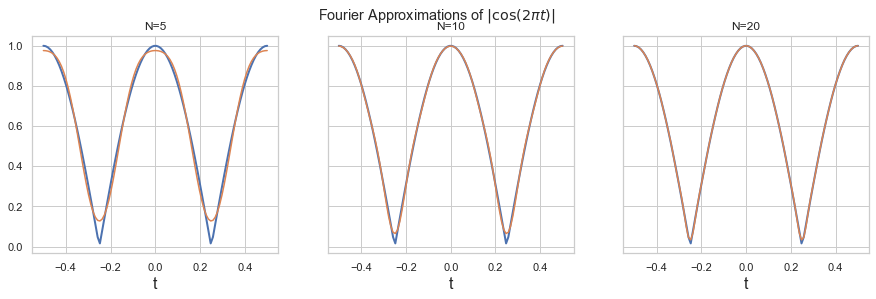

In [47]:
# Plot the sum of all the terms versus time
fapprox1 = sm.re(sum(terms1))
fapprox2 = sm.re(sum(terms2))
fapprox3 = sm.re(sum(terms3))

# Convert sympy expressions to numpy via sm.lambdify()
approx = [sm.lambdify(t, fapprox1), sm.lambdify(t, fapprox2), sm.lambdify(t, fapprox3)]

# Initialize some ploting parameters
Ns = [5,10,20]
time = np.linspace(-1/2,1/2,100)

RectifiedCosine = lambda t: abs(np.cos(2*np.pi*(t % 2)))

# Begin plotting
fig,ax = plt.subplots(1, 3, sharey=True,figsize=(15,4))
for i in range(len(approx)):
    ax[i].plot(time, RectifiedCosine(time), label='Original', lw=2)
    ax[i].plot(time, approx[i](time)) # Plot two cycles
    ax[i].set_xlabel('t')
    ax[i].set_title('N='+str(Ns[i]))
plt.suptitle(r'Fourier Approximations of $|\cos{(2\pi t)}|$')
plt.show()

### 4. Orthogonality

Show that $\cos(2\pi t)$ and $\sin(2 \pi t)$ are orthogonal by showing that their inner product (a.k.a. dot product) is zero. Hint: Express the two functions in exponential form, and expand their product inside the integral.

**Grading Breakdown:**

    3pts for using the definition of inner product
    4pt for converting to complex exponentials or using a trig identity to simplify
    3pts for showing <f,g>=0

4)

Recall that for $f,g,h \in L^2[0,1]$, the **inner product** is defined by:

$$
(f,g) = \int_0^1 f(t)\overline{g(t)} dt.
$$

Let's set $f(t) = \cos{(2\pi t)}$ and $g(t) = \overline{g(t)} = \sin{(2\pi t)}$ (because it's a real valued function) and take their inner product:

$$
\begin{align}
(f,g) &= \int_0^1 \cos{(2\pi t)}\sin{(2\pi t)} dt \\
&= \frac{1}{2}\int_0^1 (\sin{(2\pi t + 2\pi t)} + \sin{(2\pi t - 2\pi t)})dt \\
&= \frac{1}{2}\int_0^1 \sin{(4\pi t)}dt \\
&= \frac{1}{2}(-\frac{1}{4\pi}\cos{(4\pi t)}) \bigg \rvert_{t=0}^{t=1} \\
&= -\frac{1}{8\pi} (\cos{(4\pi)} - \cos{(0)}) \\
&= -\frac{1}{8\pi}(1 - 1) \\
&=0.
\end{align}
$$

### 5. Fourier Transforms

Find the Fourier Transforms of the following functions. You can use `sympy`. Make sure to simplify, these shouldn't give complicated results. Plot original functions and their transforms in a nice 3 $\times$ 2 grid of plots. Label the sub plots.

$$
f(t) = \left \{ 
\begin{array}{l}
1 \;\mathrm{if} \;t \geq 0 \\
0 \;\mathrm{else}
\end{array}
\right .
$$

$$
f(t) = \frac{1}{1+t^2}
$$

$$
f(t) = e^{-\pi t^2}
$$

**Grading Breakdown:**

    2pts for finding the FT of (a)
    2pts for finding the FT of (b)
    2pts for finding the FT of (c)
    4pts for a subplot of all the FTs and f(t)s

5.a)

We begin with the definition of the FT applied to the function:

$$\begin{align}
F(s) &= \int_{-\infty}^{\infty}f(t) e^{-2\pi i s t}dt \\
&= \int_{0}^{\infty} (1)e^{-2\pi i s t}dt \\
&= \frac{-1}{2\pi is}e^{-2\pi ist} \bigg \rvert_{t=0}^{t=\infty} \\
&= \frac{-1}{2\pi is} ( e^{-\infty} - e^{0}) \\
&= \frac{1}{2\pi is}.
\end{align}$$

Note that on a symmetric finite interval, this would be the $sinc$ function instead.

In [9]:
# 5.a) Check

t, s = sm.var("t s")
a = sm.oo
ft_a = 1
Ff_a = sm.integrate(sm.exp(-2*sm.pi*sm.I*s*t) * ft_a,(t,0, a))
Ff_a.simplify()

⎧      -ⅈ              │         π│   π
⎪     ─────        for │arg(s) + ─│ < ─
⎪     2⋅π⋅s            │         2│   2
⎪                                      
⎪∞                                     
⎨⌠                                     
⎪⎮  -2⋅ⅈ⋅π⋅s⋅t                         
⎪⎮ ℯ           dt       otherwise      
⎪⌡                                     
⎪0                                     
⎩                                      

5.b)

Begin with the transform pair off of a standard FT transform table:

$$\mathcal{F}\{e^{-\alpha |t|}\} = \frac{2\alpha}{\alpha^2 + 4\pi^2 f^2}.$$

Setting $\alpha=2\pi$ implies

$$
\mathcal{F}\{e^{-2\pi |t|}\} = \frac{2(2\pi)}{4\pi^2 + 4\pi^2 f^2} \\
=  \frac{4\pi}{4\pi^2} \frac{1}{1 + f^2} \\
= \frac{1}{\pi}\frac{1}{1 + f^2} .
$$
Thus,
$$\pi \mathcal{F}\{e^{-2\pi |t|}\} = \frac{1}{1 + f^2},$$ 

and using the duality property gives us
$$\mathcal{F}\{\frac{1}{1 + t^2}\} = \pi e^{-2\pi |f|}.$$

So, for us, this is written as $F(s) = \pi e^{-2\pi |s|}$. See the following for a different approach:

http://mathworld.wolfram.com/FourierTransformExponentialFunction.html

In [10]:
# Let's check
a = sm.oo
ft_b = 1 / (1 + t**2)
Ff_b = sm.integrate(sm.exp(-2*sm.pi*sm.I*s*t) * ft_b,(t,-a, a))
Ff_b.simplify()

⎧       -2⋅π⋅s               
⎪    π⋅ℯ            for s > 0
⎪                            
⎪∞                           
⎪⌠                           
⎪⎮   -2⋅ⅈ⋅π⋅s⋅t              
⎨⎮  ℯ                        
⎪⎮  ─────────── dt  otherwise
⎪⎮      2                    
⎪⎮     t  + 1                
⎪⌡                           
⎪-∞                          
⎩                            

5.c)

We begin with the definition of the FT applied to the function:

$$
F(s) = \int_{-\infty}^{\infty}e^{-\pi t^2} e^{-2\pi i s t}dt \\
= \int_{-\infty}^{\infty} e^{-\pi(t^2 + 2i s t)}dt.
$$

Now we need to complete the square. This is given by the formula:

$$ax^2 + bx + c = 0 \implies a(x + \frac{b}{2a})^2 + (c-\frac{b^2}{4a})$$

So for us, $a = 1,$ $b = 2is$, and $c = 0$ and that gives us $(t + \frac{2is}{2})^2 - \frac{(2is)^2}{4}$. Simplifying gives

$$
F(s) = \int_{-\infty}^{\infty}e^{-\pi(t + is)^2 + s^2}dt \\
= e^{-\pi s^2} \int_{-\infty}^{\infty}e^{-\pi(t + is)^2}dt.
$$

Now we will use the fact that the integral of an arbitrary Gaussian is:

$$\int_{-\infty}^{\infty}e^{-a(x+b)^2}dx = \sqrt {\frac{\pi}{a}}.$$

Setting $a = \pi$ and $b = is$ we find

$$
e^{-\pi s^2} \int_{-\infty}^{\infty}e^{-\pi(t + is)^2}dt = \sqrt {\frac{\pi}{\pi}}e^{-\pi s^2},
$$

so

$$
F(s)= e^{-\pi s^2}.
$$

In [11]:
# 5.c) Check

a = sm.oo
ft_c = sm.exp(-sm.pi * t**2)
Ff_c = sm.integrate(sm.exp(-2*sm.pi*sm.I*s*t) * ft_c,(t,-a, a))
Ff_c.simplify()

     2
 -π⋅s 
ℯ     

Good tutorial on sharing axes:

https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html

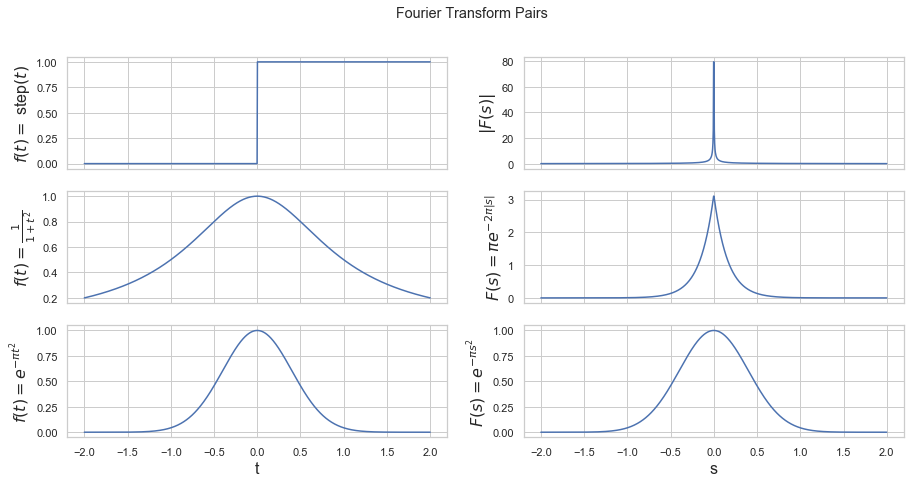

In [48]:
s = np.linspace(-2,2,1000)
t = s

# The f(t) functions
fta = lambda t: np.where(t>=0, 1, 0)  
ftb = 1 / (1 + t**2)
ftc = np.exp(-np.pi*t**2)

# The Fourier Transforms
FTa = abs(1 / (2*np.pi*sm.I*s)) # Can't plot Argand Diagram along with these so let's just do magnitude 
FTb = np.pi*np.exp(-2*np.pi*np.abs(s))
FTc = np.exp(-np.pi*s**2)

# Begin plotting
fig,ax=plt.subplots(3,2,sharex=True,figsize=(15,7))

ax[0,0].plot(t, fta(t)); ax[0,0].set_ylabel(r"$f(t) =$ step$(t)$")
ax[0,1].plot(s, FTa); ax[0,1].set_ylabel(r"$|F(s)|$")

ax[1,0].plot(t, ftb ); ax[1,0].set_ylabel(r"$f(t)=\frac{1}{1+t^2}$")
ax[1,1].plot(s, FTb); ax[1,1].set_ylabel(r"$F(s)=\pi e^{-2\pi |s|}$")

ax[2,0].plot(t, ftc); ax[2,0].set_ylabel(r"$f(t)=e^{-\pi t^2}$"); ax[2,0].set_xlabel('t');
ax[2,1].plot(s, FTc); ax[2,1].set_ylabel(r"$F(s)=e^{-\pi s^2}$"); ax[2,1].set_xlabel('s');
plt.suptitle('Fourier Transform Pairs')
plt.show()

### 6. Solve a system of ODEs

Similar to the ODE example in the notes, find a solution to the two differential equations

\begin{eqnarray}
\dot x & = & -y \\
\dot y & = & -x + u
\end{eqnarray}

a) First take the Fourier Transform of both equations. 

b) Solve for $Y(s)$ in terms of $U(s)$. 

c) Note that the solution for $Y(s)$ involves a function of $s$ times $U(s)$. Figure out the inverse Fourier Transform of that function. 

d) Use a convolution to figure out $y(t)$ in terms of $u(t)$. 

e) Find $X(s)$ in terms of $Y(s)$ and then $x(t)$ in terms of $y(t)$. 

**Grading Breakdown:**

    2pts (a) for taking the Fourier Transform of both equations 
    2pts (b) for solving for Y(s) in terms of U(s)
    2pts (c) for figuring out the inverse Fourier Transform of that function
    2pts (d) Using a convolution to figure out y(t) in terms of u(t)
    2pts (e) for finding x(t) in terms of y(t)

6.a)

We begin by taking the FT of both equations:
$$
\mathcal{F}\{\dot x\} = \mathcal{F}\{-y\} \\
\mathcal{F}\{\dot y\} = \mathcal{F}\{-x + u\}.
$$

This gives us

$$
2\pi i s X(s) = -Y(s) \\
2\pi i s Y(s) = -X(s) + U(s).
$$

6.b)

Rearranging we see:

$$
Y(s) = -2\pi i s X(s) \\
X(s) = U(s) - 2\pi i s Y(s).
$$

This implies

$$\begin{align}
Y(s) &= -2\pi i s (U(s) - 2\pi i s Y(s)) \\
& = \frac{-2\pi i s}{1 - (2\pi i s)^2}U(s).
\end{align}
$$

In [13]:
#6.c) Check "manually"
t, s = sm.var("t s")

a = sm.oo
FT = (-2*sm.pi*sm.I*s) / (1 - (2*sm.pi*sm.I*s)**2) # The function of interest
ft = sm.integrate(sm.exp(2*sm.pi*sm.I*s*t) * FT,(s,-a, a))
ft.simplify()

sm.simplify(FT)

 -2⋅ⅈ⋅π⋅s  
───────────
   2  2    
4⋅π ⋅s  + 1

6.d)

Multiplication of Fourier Transforms is convolution in the time domain:

$$y(t) = \frac{1}{2}e^{-t}*u(t)\\
= \frac{1}{2}\int_0^\infty e^{-\tau}u(t-\tau) d \tau. 
$$

6.e)

Starting with our expression from part b:

$$\begin{align}
X(s) &= U(s) - 2\pi i s Y(s) \\
&= U(s) +  \frac{(2\pi i s)^2}{1 - (2\pi i s)^2}U(s)
\end{align}
$$

so in the time domain:

$$\begin{align}
x(t) &= u(t) - \frac{d}{dt}y(t) \\
&= u(t) +  \frac{1}{2}e^{-t}*u(t) \\
&= u(t) + \frac{1}{2}\int_0^\infty e^{-\tau}u(t-\tau) d \tau.
\end{align}
$$

In [14]:
# Check "manually"
a = sm.oo
FT2 = (-2*sm.pi*sm.I*s)**2 / (1 - (2*sm.pi*sm.I*s)**2)
ft2 = sm.integrate(sm.exp(2*sm.pi*sm.I*s*t) * FT2,(s,-a, a))
ft2.simplify()

⎧            -t                                                         
⎪           ℯ                                                           
⎪           ───              for │2⋅arg(t) - π│ < π ∧ │2⋅arg(t) + π│ < π
⎪            2                                                          
⎪                                                                       
⎪∞                                                                      
⎪⌠                                                                      
⎨⎮      2  2  2⋅ⅈ⋅π⋅s⋅t                                                 
⎪⎮  -4⋅π ⋅s ⋅ℯ                                                          
⎪⎮  ──────────────────── ds                   otherwise                 
⎪⎮         2  2                                                         
⎪⎮      4⋅π ⋅s  + 1                                                     
⎪⌡                                                                      
⎪-∞                                                

### 7. The DFT

a) Write a python function that takes an integer $N$ and returns a `sympy` matrix representing the DFT matrix $\mathbf{F}$ as defined in the notes. 

b) Define $\mathbf{U} = \frac{1}{\sqrt{N}}\mathbf{F}$. Find the eigenvalues of $\mathbf{U}$ for various values of $N$. What do you notice? Is there a pattern?

c) Make a random sequence of $20$ real numbers between 0 and 1. Find the DFT using your matrix and compare it to the DFT you get using `numpy`'s built in function. Hint: you should convert your $\mathbf{F}$ matrix into a `numpy` matrix first. Plot your sequence, the magnitude of the DFT and the angle of the DFT.

**Grading Breakdown:**

    1pt  (a) for including a docstring
    2pts (a) for writing a function that returns the DFT matrix
    1pt  (b) finding the eigenvalues of U 
    1pt  (b) for stating the pattern
    1pt  (c) for making a random sequence in [0,1]
    2pts (c) for comparing our DFT with numpy's
    2pts (c) for plotting your sequence, the magnitude of the DFT and the angle of the DFT

Recall: 

$$
\mathbf{F} = \begin{pmatrix}
\omega_n^{0\cdot 0} & \dots & \omega_n^{0\cdot (n-1)} \\
\vdots & & \vdots \\
\omega_n^{(n-1)\cdot 0} & \dots & \omega_n^{(n-1)\cdot (n-1)}
\end{pmatrix}
$$

and see the following for more information:

http://users.metu.edu.tr/ccandan/pub_dir/Eig_Structure_DFT_IEEE_SPM_Column_March2011.pdf

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.dft.html

In [15]:
# 7.a

def myDFT(n, use='np'):
    '''
    Assumes n indicates the nth primitive root of wn = exp(-i 2pi/n). 
    Returns the nxn DFT matrix
    '''
    wn = np.cos(-2*np.pi/ n) + 1j*np.sin(-2*np.pi/ n) if use=='np' else sm.exp(-2*sm.pi*sm.I/ n)  
    B = wn*np.ones((n,n)) # matrix of bases (i.e. the nth primitive root is in every entry) 
    
    a = np.asarray(range(0,n)).reshape((n,1)) # creates a column vector of the powers
    E = a @ a.T # Creates a matrix of the powers via broadcasting
    M = np.power(B,E) if use=='np' else sm.Matrix(np.power(B,E)) # Raises each element of B to the corresponding element of E
    return M 

myDFT(4,use='sm')

⎡1    1      1      1   ⎤
⎢                       ⎥
⎢1  -1.0⋅ⅈ  -1.0  1.0⋅ⅈ ⎥
⎢                       ⎥
⎢1   -1.0   1.0    -1.0 ⎥
⎢                       ⎥
⎣1  1.0⋅ⅈ   -1.0  -1.0⋅ⅈ⎦

In [16]:
def myDFT2(n): # More straightforward implementation
    '''
    Assumes n indicates the nth primitive root of wn = exp(-i 2pi/n). 
    Returns the nxn DFT matrix
    '''
    wn = sm.exp(-2*sm.pi*sm.I/ n)  
    F = np.empty((n,n)) # Initialize empty matrix of correct size
    F = sm.Matrix(F) # Convert to sympy matrix
    for i in range(n):
        for j in range(n):
            F[i,j] = wn**(i*j) # Fill in the ijth entry
    return F
myDFT2(4)

⎡1  1   1   1 ⎤
⎢             ⎥
⎢1  -ⅈ  -1  ⅈ ⎥
⎢             ⎥
⎢1  -1  1   -1⎥
⎢             ⎥
⎣1  ⅈ   -1  -ⅈ⎦

Comparing our function with scipy's shows that they are very similar. To check manually to convince yourself try evaluating the primitive root at different powers: 
`n=3
wn = sm.exp(-2*sm.pi*sm.I/ n)
sm.N(wn.expand(complex=True))`

Below we'll runs some tests to see which verision is fastest:

In [17]:
%timeit myDFT(4,use='sm') 

488 µs ± 38.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
%timeit myDFT(4,use='np')

21.8 µs ± 1.44 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
%timeit myDFT2(4)

599 µs ± 45.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
%timeit scipy.linalg.dft(4)

9.4 µs ± 337 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [21]:
# 7.b) Find the eigenvalues of a Unitary DFT matrix

ns = (1,2,4)
Us = [(1/sm.sqrt(n))*myDFT(n,use='sm') for n in ns]
[i.eigenvals() for i in Us]

[{1: 1}, {-1: 1, 1: 1}, {-1: 1, 1: 2, -ⅈ: 1}]

We notice that the eigenvalues can only take on different powers of $i$ so $\lambda(\mathbf{U})\in\{1,i,-1,-i\}$.

In [22]:
# 7.c) Plot your sequence, the magnitude of the DFT and the angle of the DFT.

x = np.random.rand(20).reshape((20,1)) # create a random vector
myX = myDFT(20) @ x # Our DFT
X = np.fft.fft(x) # Take np DFT using np.fft
X2 = scipy.linalg.dft(20) @ x

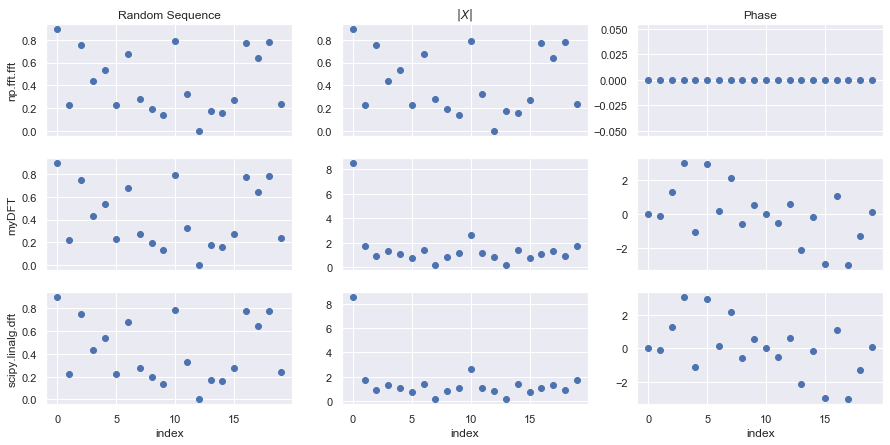

In [23]:
'''
Let's use the np.angle() and abs() function.
'''

fig,ax=plt.subplots(3,3, sharex=True, figsize=(15,7))

# Set the magnitude and phase from np.fft function
xphase = np.angle(X)
xmag = abs(X)

# Set the magnitude and phase from scipy.linalg.dft function
xphase2 = np.angle(X2)
xmag2 = abs(X2)

# Set the magnitude and phase from our function
my_xphase = np.angle(myX)
my_xmag = abs(myX)

ax[0,0].plot(x,'o'); ax[0,0].set_ylabel('np.fft.fft'); ax[0,0].set_title('Random Sequence')
ax[0,1].plot(xmag,'o'); ax[0,1].set_title(r'$|X|$')
ax[0,2].plot(xphase,'o'); ax[0,2].set_title('Phase'); 

ax[1,0].plot(x,'o'); ax[1,0].set_ylabel('myDFT'); 
ax[1,1].plot(my_xmag,'o'); 
ax[1,2].plot(my_xphase,'o'); 

ax[2,0].plot(x,'o'); ax[2,0].set_ylabel('scipy.linalg.dft'); ax[2,0].set_xlabel('index')
ax[2,1].plot(xmag2,'o'); ax[2,1].set_xlabel('index')
ax[2,2].plot(xphase2,'o'); ax[2,2].set_xlabel('index')
plt.show()

#### 8. Filtering

Repeat the example from the notes on filtering the sum of two sine waves, except do the sum of a sine wave plus zero centered Gaussian noise with variance 0.25. Note, to make a list of numbers random Gaussian numbers, use the function `np.random.normal`. In the notes, a cutoff of 10 was used. Tune this to try to recover the sine wave as best you can in the low pass filtered version.

**Grading Breakdown:**

    2pts for defining mu=0 and sigma = np.sqrt(0.25) 
    2pts for using np.random.normal to generate a noise term
    3pts for adding noise to a sine term from the example in class
    3pts for tuning the cutoff to recover a better sine wave

In [24]:
# Example: Filters (Modified for the HW)

n = 500
sigma, mu = np.sqrt(0.25), 0.0 # The standard deviation and the mean
noise = np.random.normal(mu, sigma, n)

x = np.sin(np.linspace(0,20,n)) + noise
X = np.fft.fft(x)

cut = 4 # Tuning parameter

HPF = np.copy(X)
HPF[0:cut] = 0 # remove low frequencies
HPF[-cut:n] = 0
xhpf = np.real(np.fft.ifft(HPF))

LPF = np.copy(X)
LPF[cut:n-cut] = 0 # remove high frequencies
xlpf = np.real(np.fft.ifft(LPF))

**Results:** At a cuttoff of $4$, the boundary values of the LPF sine wave are messed up but, overall, the shape is fairly close.

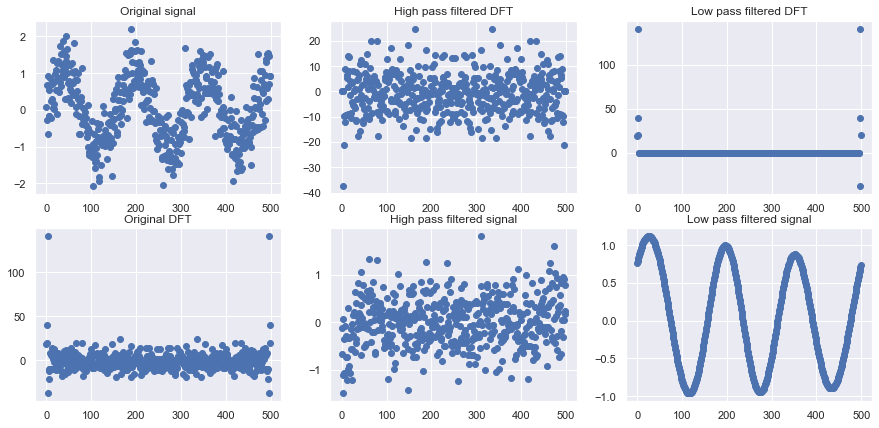

In [25]:
#Begin plotting
fig,ax=plt.subplots(2,3,figsize=(15,7))

ax[0,0].plot(x,'o'); ax[0,0].set_title("Original signal")
ax[1,0].plot(np.real(X),'o'); ax[1,0].set_title("Original DFT")

ax[0,1].plot(np.real(HPF),'o'); ax[0,1].set_title("High pass filtered DFT")
ax[1,1].plot(xhpf,'o'); ax[1,1].set_title("High pass filtered signal")

ax[0,2].plot(np.real(LPF),'o'); ax[0,2].set_title("Low pass filtered DFT")
ax[1,2].plot(xlpf,'o'); ax[1,2].set_title("Low pass filtered signal")
plt.show()

### 9.  Image Processing

Find a nice gray scale image to load, or use the Minion image from class. Call the resulting matrix $m$.

a) Render the image using `matplotlib`. 

b) Take the DFT of the image $m$ to get a matrix $M$. Then make a new matrix $M_\mathrm{new}$ in which each entry is just the magnitude of the corresponding entry in $M$. Create a new image from the inverse Fourier transform of this image and render it. 

c) Do the same thing, except set the entries in $M_\mathrm{new}$ to the angle of the entries in $M$. Create a new image from the inverse Fourier transform of this image and render it.

d) Do the same thing, except normalize all the entries in $M_\mathrm{new}$ to have magnitude $\leq$ 1. Create a new image from the inverse Fourier transform of this image and render it.

What might you conclude about the information contained in the magnitude of the transformed image? What might you conclude about the information contained in the angle?

**Extra Credit:** Do this exercise with a color image instead of gray scale.

**Grading Breakdown:**

    2pts (a) for rendering the image in matplotlib    
    1pt  (b) for taking the DFT of the  to get M
    1pt  (b) for Mnew being the magnitude of M
    1pt  (b) for creating a new image via ifft2
    1pt  (c) for Mnew being the angle of M
    1pt  (c) for creating a new image via ifft2
    2pts (d) for Mnew being the normalization of the entries of M
    1pt  (d) for creating a new image via ifft2
    
    +6pts if the extra credit is done right

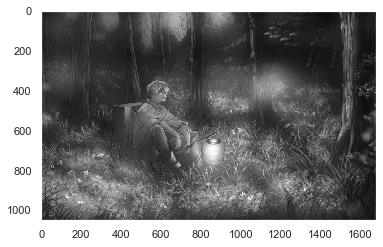

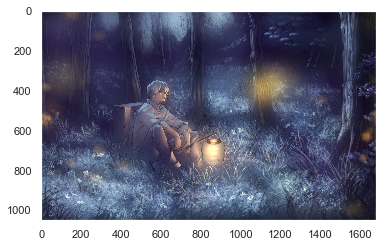

In [26]:
# 9.a) Render the image using matplotlib.

m = imageio.imread('mushi.jpg',as_gray=True)
plt.imshow(m, cmap = 'gray')
plt.grid(False)
plt.show()

m2 = imageio.imread('mushi.jpg')
plt.imshow(m2)
plt.grid(False)
plt.show()

9.b)

Normally, we can just use `np.abs()` to take the magnitude of the `fft`. However, if the dynamic range of grayscale values is high, then we should take a logarithmic transformation, like in `20*np.log(np.abs(M))`.

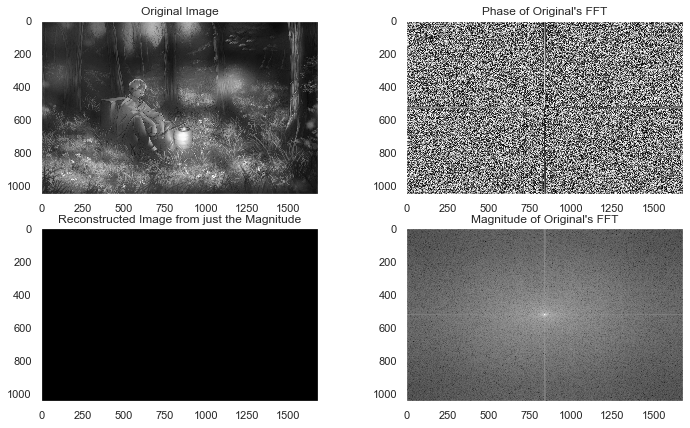

In [27]:
M = np.fft.fft2(m) # Take DFT of image
M = np.fft.fftshift(M) # Shift it so the low frequencies are in the middle

Mnew_b = 20*np.log(np.abs(M)) # Each entry is just the magnitude of the corresponding entry in M 
mnew_b = np.fft.ifft2(Mnew_b) # Create a new image from the inverse FT of this image 

fig, ax = plt.subplots(2,2,figsize=(12,7))
ax[0,0].imshow(m, cmap = 'gray'); ax[0,0].set_title('Original Image')
ax[0,1].imshow(np.angle(M), cmap = 'gray'); ax[0,1].set_title("Phase of Original's FFT")
ax[1,0].imshow(np.abs(mnew_b), cmap = 'gray'); ax[1,0].set_title('Reconstructed Image from just the Magnitude')
ax[1,1].imshow(Mnew_b, cmap = 'gray'); ax[1,1].set_title("Magnitude of Original's FFT")


ax[0,0].grid(False); ax[0,1].grid(False); ax[1,0].grid(False); ax[1,1].grid(False)
plt.show()

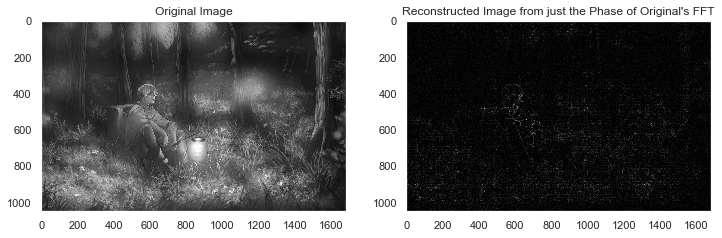

In [28]:
# 9.c) set the entries in  Mnew  to the angle of the entries in  M.

Mnew_c = np.divide(M, abs(M)) # Each entry is just the angle of the entries in M (Note np.angle() could work)
mnew_c = np.fft.ifft2(Mnew_c) # Create a new image from the inverse FT of this image 

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].imshow(m, cmap = 'gray'); ax[0].set_title("Original Image")
ax[1].imshow(abs(mnew_c), cmap = 'gray'); ax[1].set_title("Reconstructed Image from just the Phase of Original's FFT")
ax[0].grid(False); ax[1].grid(False)
plt.show()

The smallest magnitude is: 2.2342117 
The biggest magnitude is: 131364150.0

Now, the smallest magnitude is: 1.04496385e-08 
The biggest magnitude is: 1.0


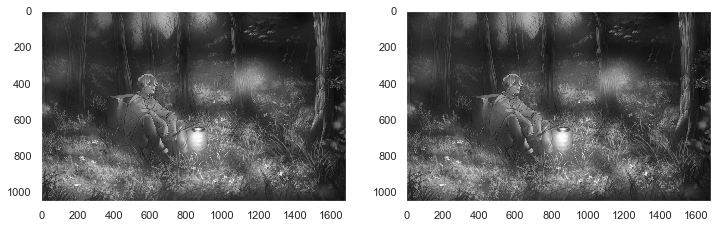

In [29]:
# 9.d)  Do the same thing, except normalize all the entries in  Mnew  to have magnitude <= 1. 

# Get the current max and min values of the data
smallest = np.amin(abs(M))
biggest = np.amax(abs(M))
print('The smallest magnitude is:',smallest,'\nThe biggest magnitude is:',biggest)

# Set the desired max and min values for the data
newmax = 1
newmin = 0

# Formula for data normalization in Image Processing
Mnew_d = (M - smallest) * (newmax - newmin)/(biggest - smallest)  + newmin 

# Create a new image from the inverse FT of this image 
mnew_d = np.fft.ifft2(Mnew_d) 

biggest = np.amax(abs(Mnew_d))
smallest = np.amin(abs(Mnew_d))
print('\nNow, the smallest magnitude is:',smallest,'\nThe biggest magnitude is:',biggest)

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].imshow(m, cmap = 'gray')
ax[1].imshow(np.abs(mnew_d), cmap = 'gray')
ax[0].grid(False); ax[1].grid(False)
plt.show()

Q1: What might you conclude about the information contained in the magnitude of the transformed image? 

Q2: What might you conclude about the information contained in the angle?

See the notes below.

**Some Notes About the DFT** (Source: https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/topic1.htm)

**While the amplitude spectrum reveals the presence of particular basis images in an image, the phase spectrum encodes their relative shifts. Thus, without phase information, the spatial coherence of the image is destroyed to such extent that it is impossible to recognise depicted objects. Without amplitude information, the relative brightnesses of these objects cannot be restored, although the boundaries between them can be found. Because phase is so important to keep the overall visuall appearance of an image, most of image processing operations in the frequency domain do not alter the phase spectrum and manipulate only the amplitude spectrum.**

$\bullet$ The number of frequencies corresponds to the number of pixels in the spatial domain image.

$\bullet$ The most common pixel format is the byte image, where this number is stored as an 8-bit integer giving a range of possible values from 0 to 255. Typically zero is taken to be black, and 255 is taken to be white.

$\bullet$ The Fourier Transform produces a complex number valued output image which can be displayed with two images, either with the real and imaginary part or with magnitude and phase.

See also,

http://web.archive.org/web/20130513181427id_/http://sharp.bu.edu/~slehar/fourier/fourier.html#filtering